In [8]:
%matplotlib inline
import skimage.exposure as exposure
from snappy import ProductIO
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np


In [9]:
file_path = '/home/xin/桌面/Sen-Tutorial/Sen-Snappy-Data/S2A_MSIL2A_20200130T025941_N0213_R032_T49QGE_20200130T070354.SAFE/MTD_MSIL2A.xml'
product = ProductIO.readProduct(file_path)
Band_name = 'B1'
# list(product.getBandNames())


In [10]:
Band = product.getBand(Band_name)
Width = Band.getRasterWidth()
Height = Band.getRasterHeight()
Band_data = np.zeros(Width*Height, dtype = np.float32) # initial band
Band.readPixels(0,0,Width,Height,Band_data)  # 将B5中像元值读入B5_data中？
Band_data.shape = (Height,Width)  # S2 band with numpy format


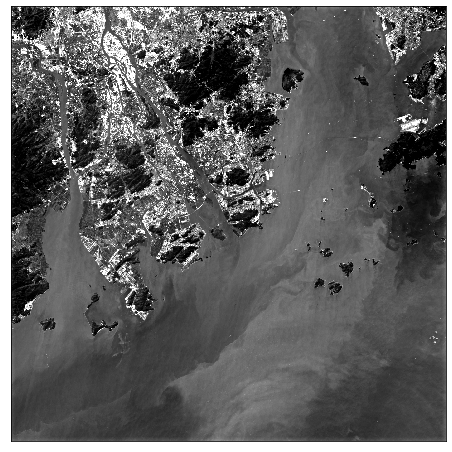

In [11]:
## display
val1,val2 = np.percentile(Band_data, (2.5,97.5))  
Band_data_new = exposure.rescale_intensity(Band_data, in_range=(val1,val2)) ## image streching
plt.figure(figsize=(8, 8))                 
fig = plt.imshow(Band_data_new, cmap = cm.gray)  
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# ProductIO.writeProduct(B5_data, 'B5_data.tif', 'GeoTIFF')??

